In [1]:
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.stats.multitest import multipletests
from statannot import add_stat_annotation
from scipy.stats import chi2_contingency
from cellrank.estimators import GPCCA
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import scanpy.external as sce
import scrublet as scr
#import pyranges as pr
import seaborn as sns
import cellrank as cr
import scvelo as scv
import pandas as pd
import scanpy as sc
import numpy as np
import collections
import matplotlib
#import pyBigWig
#import networkx
#import pyscenic
import requests
#import network
#import fsspec
import anndata
#import igraph
import scvi
import h5py
import desc 
import umap
import sys
import re
import os


#%load_ext rpy2.ipython
%matplotlib inline 


sc.settings.verbosity = 3     


# Setting the random seed
np.random.seed(42)


# Setting figure size
plt.rcParams.update({'font.size': 9})
sc.set_figure_params(figsize=(2, 2), format = 'svg', dpi_save = 300)

Global seed set to 0
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


... reading from cache file cache/Users-brendamelano-Desktop-Reprogramming_Osteosarcoma-Lineage_Tracing-scRNAseq_LT_analysis-OS384-OS384_inVivo_featureRef.h5ad


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


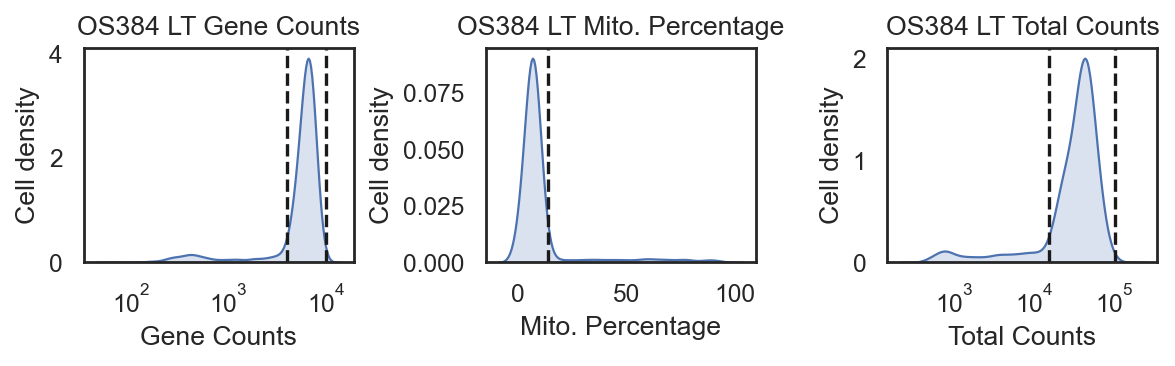

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/core/_anndata.py:610: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f"initial_size_{layer}"] = get_size(adata, layer)
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])


Filtered out 49082 genes that are detected 20 counts (shared).


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])


Normalized count data: X, spliced, unspliced.


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html 

Extracted 1500 highly variable genes.
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/var/folders/lt/nhcx288j6jjfg45n3bhh1mjh0000gn/T/ipykernel_80270/378808946.py:87: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata)
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Use

`n_top_genes` > `adata.n_var`, returning all genes.
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    538 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    608 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['n_counts', 'pct_counts_mt', 'ccdifference']
    sparse input is densified and may lead to high memory use


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2167: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  dtyp = np.find_common_type([x.dtype, np.float64], [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-

    finished (0:00:05)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
python(83762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


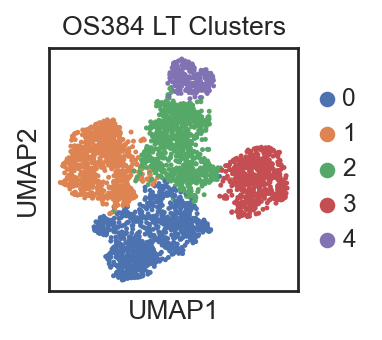

In [2]:
# Loading the Feature ref version
adata = scv.read('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384/OS384_inVivo_featureRef.loom', cache = True)


# Making the var names unique
adata.var_names_make_unique()


# Filtering as is done in Seurat
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'


# Computing mitochondrial percentage
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


# Data for the variables
variables = [
    ('n_genes_by_counts', [(4000, '--'), (10000, '--')]),
    ('pct_counts_mt', [(14, '--')]),
    ('total_counts', [(15000, '--'), (100000, '--')])
]


# Dictionary for new titles
titles = {
    'n_genes_by_counts': 'Gene Counts',
    'pct_counts_mt': 'Mito. Percentage',
    'total_counts': 'Total Counts'
}


# Setting the theme without gridlines
sns.set_theme(style="white")


# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))


# Iterate over the variables and their respective lines to plot
for ax, (var, lines) in zip(axes, variables):
    sns.kdeplot(data=adata.obs, x=var, fill=True, alpha=0.2, ax=ax,
                log_scale=True if var != 'pct_counts_mt' else False)
    for line, style in lines:
        ax.axvline(x=line, color='k', linestyle=style)
    ax.set_title(f"OS384 LT {titles[var]}")  # Simpler title without extra text
    ax.set_xlabel(titles[var])  # Optionally keep the x-label as the new title
    ax.set_ylabel("Cell density")


# Adjust layout to prevent overlap
plt.tight_layout()


# Save the figure as SVG
#plt.savefig("/Users/brendamelano/Desktop/OS384_LT_filtering.svg")


# Show the plot
plt.show()


# Filtering the adata set based on total counts, genes and mitochondrial percentage
adata = adata[(adata.obs['total_counts'] >= 15000) &
                        (adata.obs['n_genes_by_counts'] >= 4000) &
                        (adata.obs['n_genes_by_counts'] < 10000) & #pct_counts_mt
                        (adata.obs['pct_counts_mt'] < 14)
                        ]


# Weren't the samples filtered in seurat? check which additional cells and genes are filtered out here
scv.pp.filter_genes(adata, min_shared_counts=20)


# Normalizing the cells by all counts across all the genes
scv.pp.normalize_per_cell(adata)


# filtering the dataset to only keep the most variable genes
# this is redundant to selecting highly variable genes
scv.pp.filter_genes_dispersion(adata, n_top_genes=1500)
# Previously 1500


# make sure that the log transformation is where it belongs in this preprocessing sequence
scv.pp.log1p(adata)


# Preserving the counts
adata.layers["counts"] = adata.X.copy() 


# Freezing the data in raw
adata.raw = adata


# creating a df with the indexes (CellIDs from the adata object)
#sample_one_index = pd.DataFrame(adata.obs.index)


# Selecting highly variable genes
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000, # previously 2000
    subset=True,
    layer="counts"
)


# Saving the gene names
genes = adata.var.index.values


# Reading in cell cycle genes in case I want to regress on that
cell_cycle_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/scvi/regev_lab_cell_cycle_genes.txt')]


# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]


# Identifying which genes are in the adata object
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]


# Computing S and G2M scores
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)


# Computing ccdifference scores
adata.obs['ccdifference'] = adata.obs['S_score'] - adata.obs['G2M_score']


# Linear dimensionality reduction
#sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata.raw = adata

# Filtering the data for the highly variable genes
adata = adata[:, adata.var.highly_variable]


# Regressing out the total numver of counts, mitochondrial percentage and the ccdifference scores
sc.pp.regress_out(adata, ['n_counts', 'pct_counts_mt', 'ccdifference'])


# Scaling the data
sc.pp.scale(adata, max_value=10)


# Performing principal component analysis
sc.tl.pca(adata, svd_solver='arpack')


# Identifying nearest neighbbors
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)


sc.tl.umap(adata)


# Performing leiden clusters
sc.tl.leiden(adata, resolution = 0.15)


# Plotting umap
sc.pl.umap(
    adata,
    color=["leiden"],
    frameon=True,
    title="OS384 LT Clusters",
    size=20,
    save="OS384_LT_Clusters.svg"
)

In [3]:

# saving the adata file with the cluster ids
adata.write("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384/OS384_LT_adata_leiden_PCA.h5ad")


# Reading in cluster labeled adata

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


AttributeError: module 'collections' has no attribute 'PathCollection'

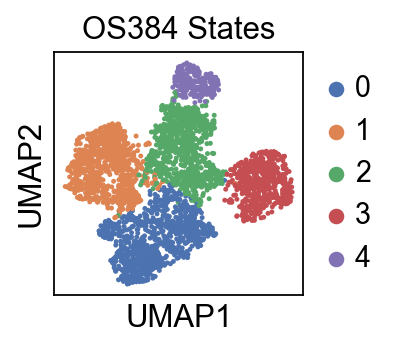

In [2]:
# Reading in the adata file from the subtype data
adata = scv.read("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/OS384_LT_adata_leiden_PCA.h5ad")


# Plot the UMAP
sc.pl.umap(
    adata,
    color=["leiden"],
    frameon=True,
    title="OS384 States",
    size=20,
    show=False  # Do not display the plot immediately
)


# Rasterize the scatter plot elements only
ax = plt.gca()
for artist in ax.get_children():
    if isinstance(artist, collections.PathCollection):  # Use the correct module path
        artist.set_rasterized(True)

        
# Save as an SVG with rasterized points
#plt.savefig("/Users/brendamelano/Desktop/OS384_LT_clusters_rasterized.svg", format='svg')
plt.show()

# Reading in state-labeled data

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


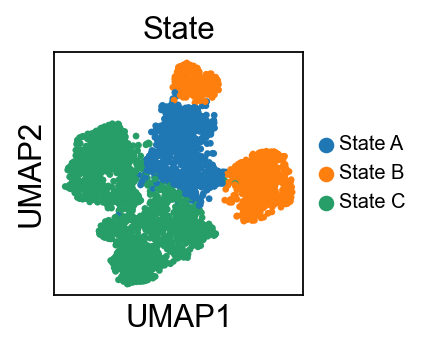

In [2]:
# Reading in the adata file from the subtype data
adata = scv.read("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/OS384_adata_states_PCA.h5ad")

    
# Plotting based on umap
sc.pl.umap(adata, color=['State'], legend_fontsize=9)



# Cluster-level state module enrichment

computing score 'State_A_score'
    finished: added
    'State_A_score', score of gene set (adata.obs).
    110 total control genes are used. (0:00:00)
computing score 'Subtype_B_score'
    finished: added
    'Subtype_B_score', score of gene set (adata.obs).
    254 total control genes are used. (0:00:00)
computing score 'Subtype_C_score'
    finished: added
    'Subtype_C_score', score of gene set (adata.obs).
    12 total control genes are used. (0:00:00)


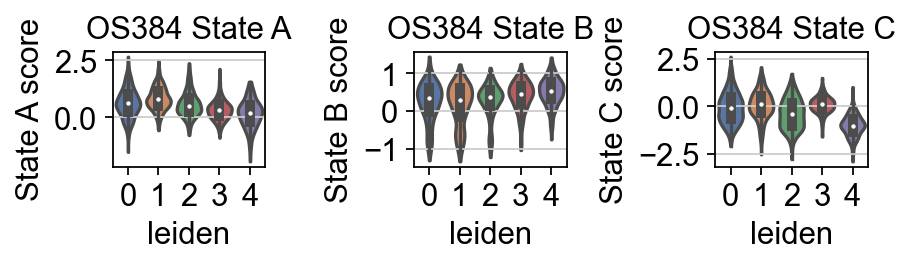

In [4]:
# Reading in gene lists for GSEA
Subtype_A_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/gmt_files/State_A_module_NMF.csv')]
Subtype_B_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/gmt_files/State_B_module_NMF.csv')]
Subtype_C_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/gmt_files/State_C_module_NMF.csv')]


# Keeping only genes that appear in the adata
Subtype_A_genes = [x for x in Subtype_A_genes if x in adata.var_names]
Subtype_B_genes = [x for x in Subtype_B_genes if x in adata.var_names]
Subtype_C_genes = [x for x in Subtype_C_genes if x in adata.var_names]


# Computing GSEA scores
sc.tl.score_genes(adata, Subtype_A_genes, ctrl_size=50, 
                  gene_pool=None, n_bins=25, 
                  score_name='State_A_score', random_state=0, copy=False, use_raw=None)

sc.tl.score_genes(adata, Subtype_B_genes, ctrl_size=50, 
                  gene_pool=None, n_bins=25, 
                  score_name='Subtype_B_score', random_state=0, copy=False, use_raw=None)

sc.tl.score_genes(adata, Subtype_C_genes, ctrl_size=50, 
                  gene_pool=None, n_bins=25, 
                  score_name='Subtype_C_score', random_state=0, copy=False, use_raw=None)


# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(5.7, 1.9))

sc.pl.violin(adata, ['State_A_score'], groupby='leiden', 
             stripplot=False, inner='box', 
             ylabel='State A score', ax=axs[0], show=False)


axs[0].set_title('OS384 State A')


sc.pl.violin(adata, ['Subtype_B_score'], groupby='leiden', 
             stripplot=False, inner='box', 
             ylabel='State B score', ax=axs[1], show=False)
axs[1].set_title('OS384 State B')

sc.pl.violin(adata, ['Subtype_C_score'], groupby='leiden', 
             stripplot=False, inner='box', 
             ylabel='State C score', ax=axs[2], show=False)
axs[2].set_title('OS384 State C')


plt.tight_layout()


# Saving the figure onto the desktop
#plt.savefig('/Users/brendamelano/Desktop/OS384_gsea_scores.svg', format='svg')
plt.show()

In [5]:
# Extracting the state scores
score_df = adata.obs[['leiden', 'State_A_score', 'Subtype_B_score', 'Subtype_C_score']].copy()


# Mean scores per cluster
mean_scores = score_df.groupby('leiden')[['State_A_score', 'Subtype_B_score', 'Subtype_C_score']].median()


# Smaller rank means a higher score (rank=1 is the highest mean score)
ranked_scores = mean_scores.rank(method='dense', ascending=False, axis=0) 


# Assign each cluster the state with the highest mean state module enrichment score (same as lowest rank score)
cluster_state_assignment = ranked_scores.idxmin(axis=1)


# 
adata.obs['dominant_state'] = adata.obs['leiden'].map(cluster_state_assignment.to_dict())


cluster_state_assignment

ranked_scores

leiden
0      State_A_score
1      State_A_score
2      State_A_score
3    Subtype_C_score
4    Subtype_B_score
dtype: object

# Defining States

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


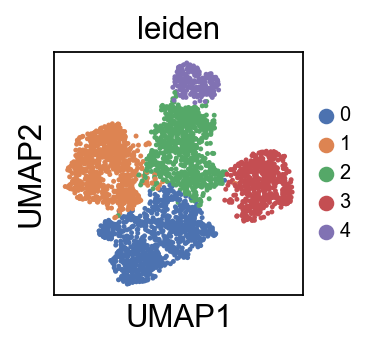

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


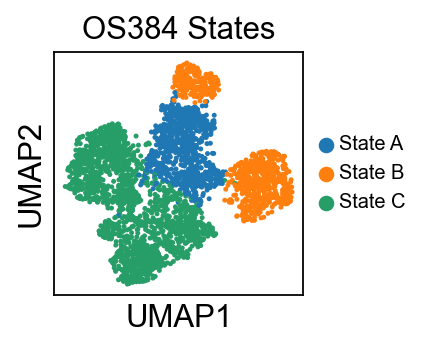

In [3]:
# Generating umap to visualize clusters
sc.pl.umap(adata, 
           color=['leiden'], 
           legend_fontsize=9, 
           size = 20)


adata.obs['leiden'] = adata.obs['leiden'].astype('category')


adata.obs['leiden'][adata.obs['leiden']=='3']='4'
adata.obs['leiden'][adata.obs['leiden']=='1']='0'


# adding labels for trajectory subtype
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = { 'State A': ['2'],  'State B': ['4'], 'State C':['0']}


# Initialize empty column in cell metadata
adata.obs['State'] = np.nan


# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.leiden).isin(cell_dict[i])
    adata.obs.loc[ind,'State'] = i

    
# Creating a dataframe with the cluster IDs
subtypes = pd.DataFrame(adata.obs['State'].values)


# Define the number of clusters
n_subtypes = len(subtypes[0].unique())


# Define a color palette with a limited number of colors
colors = sns.color_palette('pastel', n_subtypes)



# saving the adata file with the states ids
adata.write("/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/OS384_adata_states_PCA.h5ad")


# Generating UMAP to visualize clusters and save directly
sc.pl.umap(adata, 
           color=['State'], 
           legend_fontsize=9, 
           size=20, 
           title="OS384 States",
           save='OS384_State_UMAP.svg')


# GSEA

computing score 'IL2_genes_score'
    finished: added
    'IL2_genes_score', score of gene set (adata.obs).
    198 total control genes are used. (0:00:00)
computing score 'MTOR_genes_score'
    finished: added
    'MTOR_genes_score', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score 'FOCAL_ADHESION_PI3KAKTMTOR_genes_score'
    finished: added
    'FOCAL_ADHESION_PI3KAKTMTOR_genes_score', score of gene set (adata.obs).
    191 total control genes are used. (0:00:00)
computing score 'PDGF_ERK1_DOWN_genes_score'
    finished: added
    'PDGF_ERK1_DOWN_genes_score', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score 'TNFA_genes_score'


    finished: added
    'TNFA_genes_score', score of gene set (adata.obs).
    197 total control genes are used. (0:00:00)
computing score 'GCNP_genes_score'
    finished: added
    'GCNP_genes_score', score of gene set (adata.obs).
    197 total control genes are used. (0:00:00)
computing score 'CSR_genes_score'
    finished: added
    'CSR_genes_score', score of gene set (adata.obs).
    190 total control genes are used. (0:00:00)
computing score 'ESC_genes_score'
    finished: added
    'ESC_genes_score', score of gene set (adata.obs).
    199 total control genes are used. (0:00:00)
computing score 'PI3KAKTMTOR_genes_score'
    finished: added
    'PI3KAKTMTOR_genes_score', score of gene set (adata.obs).
    50 total control genes are used. (0:00:00)
computing score 'STK33_genes_score'
    finished: added
    'STK33_genes_score', score of gene set (adata.obs).
    190 total control genes are used. (0:00:00)
computing score 'VEGFA_genes_score'


    finished: added
    'VEGFA_genes_score', score of gene set (adata.obs).
    188 total control genes are used. (0:00:00)
computing score 'KRAS_genes_score'
    finished: added
    'KRAS_genes_score', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score 'TGFB_genes_score'
    finished: added
    'TGFB_genes_score', score of gene set (adata.obs).
    199 total control genes are used. (0:00:00)
computing score 'EMT_genes_score'
    finished: added
    'EMT_genes_score', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score 'EZH2_genes_score'
    finished: added
    'EZH2_genes_score', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score 'LEF1_genes_score'
    finished: added
    'LEF1_genes_score', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)


/var/folders/lt/nhcx288j6jjfg45n3bhh1mjh0000gn/T/ipykernel_76824/2482897356.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


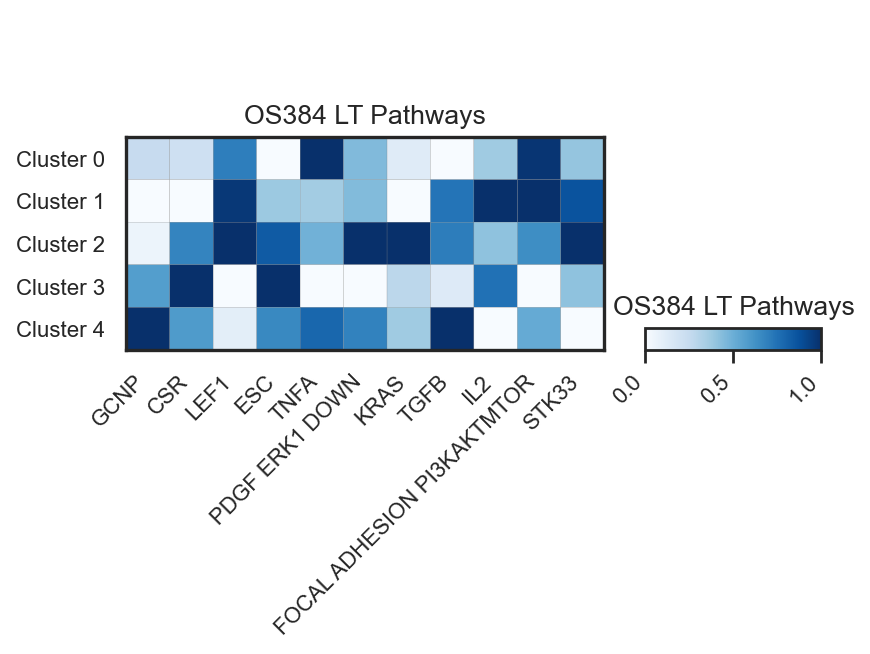

In [2]:
# Define the directory for the gmt files
directory = '/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/gmt_files'


# Create a dictionary to store gene lists
gene_lists = {}


# Create variables for gene lists
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        variable_name = os.path.splitext(filename)[0].upper()
        variable_name += "_genes"
        with open(os.path.join(directory, filename)) as f:
            gene_lists[variable_name] = [line.strip() for line in f]

            
# Create a dictionary to store gene scores for each module
gene_scores = {}


# Quantify enrichment for each gene list
for gene_list_name, gene_list in gene_lists.items():
    scores_key = gene_list_name + "_score"
    try:
        gene_scores[gene_list_name] = sc.tl.score_genes(
            adata, gene_list, ctrl_size=50, gene_pool=None,
            n_bins=5, score_name=scores_key, random_state=0, 
            copy=False, use_raw=None
        )
    except KeyError:
        continue

        
# Defining the score names
scores = [ 'GCNP_genes_score', 'CSR_genes_score',   
          'LEF1_genes_score', 'ESC_genes_score', 'TNFA_genes_score',
          'PDGF_ERK1_DOWN_genes_score', 'KRAS_genes_score', 'TGFB_genes_score',
          'IL2_genes_score', 'FOCAL_ADHESION_PI3KAKTMTOR_genes_score', 
          'STK33_genes_score']


# Plotting the pathway matrix plot 
axes_dict = sc.pl.matrixplot(
    adata,
    scores,
    "leiden",
    dendrogram=False,
    cmap="Blues",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
    show=False  # This prevents the plot from showing immediately
)


# Modify the x-axis and y-axis labels
for ax in axes_dict.values():
    labels = [label.get_text().replace('_genes_score', '').replace('_', ' ') for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right')
    
    # Set the y-axis labels to the cluster names
    cluster_labels = [f'Cluster {label.get_text()}' for label in ax.get_yticklabels()]
    ax.set_yticklabels(cluster_labels, fontsize=10)  # Adjust font size if needed
    
    ax.set_title('OS384 LT Pathways', fontsize=12)

    
# Save the figure. Ensure that all parts of the figure are on the same figure object
plt.gcf().savefig('/Users/brendamelano/Desktop/OS384_Pathways.svg', format='svg')  # Adjust path as needed


# Show the plot if desired
plt.show()

computing score 'IL2_genes_score'
    finished: added
    'IL2_genes_score', score of gene set (adata.obs).
    198 total control genes are used. (0:00:00)
computing score 'MTOR_genes_score'
    finished: added
    'MTOR_genes_score', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score 'FOCAL_ADHESION_PI3KAKTMTOR_genes_score'
    finished: added
    'FOCAL_ADHESION_PI3KAKTMTOR_genes_score', score of gene set (adata.obs).
    191 total control genes are used. (0:00:00)
computing score 'PDGF_ERK1_DOWN_genes_score'
    finished: added
    'PDGF_ERK1_DOWN_genes_score', score of gene set (adata.obs).
    145 total control genes are used. (0:00:00)
computing score 'TNFA_genes_score'


    finished: added
    'TNFA_genes_score', score of gene set (adata.obs).
    197 total control genes are used. (0:00:00)
computing score 'GCNP_genes_score'
    finished: added
    'GCNP_genes_score', score of gene set (adata.obs).
    197 total control genes are used. (0:00:00)
computing score 'CSR_genes_score'
    finished: added
    'CSR_genes_score', score of gene set (adata.obs).
    190 total control genes are used. (0:00:00)
computing score 'ESC_genes_score'
    finished: added
    'ESC_genes_score', score of gene set (adata.obs).
    199 total control genes are used. (0:00:00)
computing score 'PI3KAKTMTOR_genes_score'
    finished: added
    'PI3KAKTMTOR_genes_score', score of gene set (adata.obs).
    50 total control genes are used. (0:00:00)
computing score 'STK33_genes_score'
    finished: added
    'STK33_genes_score', score of gene set (adata.obs).
    190 total control genes are used. (0:00:00)
computing score 'VEGFA_genes_score'


    finished: added
    'VEGFA_genes_score', score of gene set (adata.obs).
    188 total control genes are used. (0:00:00)
computing score 'KRAS_genes_score'
    finished: added
    'KRAS_genes_score', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)
computing score 'TGFB_genes_score'
    finished: added
    'TGFB_genes_score', score of gene set (adata.obs).
    199 total control genes are used. (0:00:00)
computing score 'EMT_genes_score'
    finished: added
    'EMT_genes_score', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score 'EZH2_genes_score'
    finished: added
    'EZH2_genes_score', score of gene set (adata.obs).
    196 total control genes are used. (0:00:00)
computing score 'LEF1_genes_score'
    finished: added
    'LEF1_genes_score', score of gene set (adata.obs).
    195 total control genes are used. (0:00:00)


/var/folders/lt/nhcx288j6jjfg45n3bhh1mjh0000gn/T/ipykernel_76824/1013138039.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


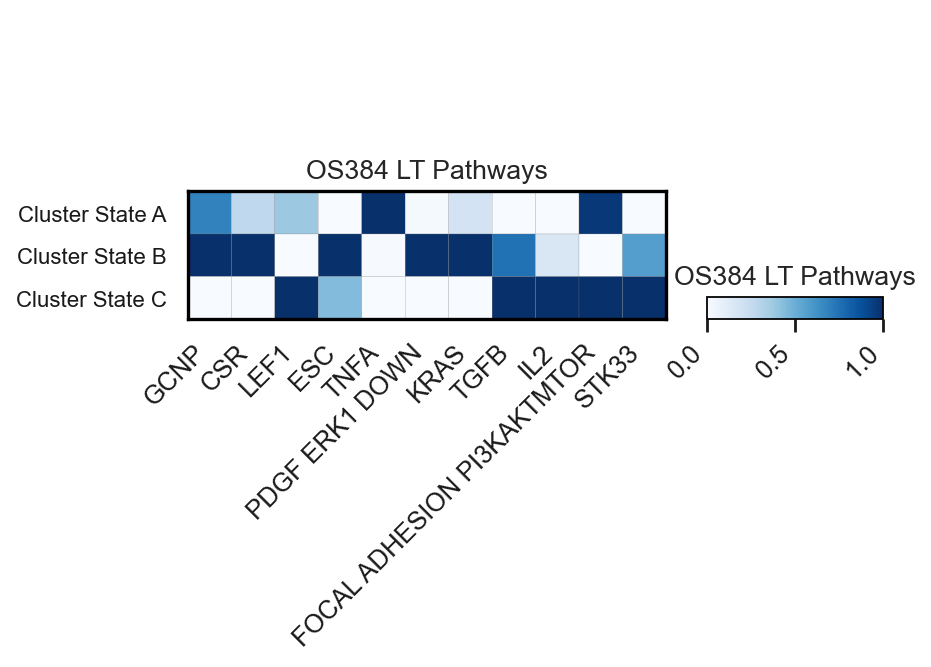

In [15]:
# Define the directory for the gmt files
directory = '/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/gmt_files'


# Create a dictionary to store gene lists
gene_lists = {}


# Create variables for gene lists
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        variable_name = os.path.splitext(filename)[0].upper()
        variable_name += "_genes"
        with open(os.path.join(directory, filename)) as f:
            gene_lists[variable_name] = [line.strip() for line in f]

            
# Create a dictionary to store gene scores for each module
gene_scores = {}


# Quantify enrichment for each gene list
for gene_list_name, gene_list in gene_lists.items():
    scores_key = gene_list_name + "_score"
    try:
        gene_scores[gene_list_name] = sc.tl.score_genes(
            adata, gene_list, ctrl_size=50, gene_pool=None,
            n_bins=5, score_name=scores_key, random_state=0, 
            copy=False, use_raw=None
        )
    except KeyError:
        continue

        
# Defining the score names
scores = [ 'GCNP_genes_score', 'CSR_genes_score',   
          'LEF1_genes_score', 'ESC_genes_score', 'TNFA_genes_score',
          'PDGF_ERK1_DOWN_genes_score', 'KRAS_genes_score', 'TGFB_genes_score',
          'IL2_genes_score', 'FOCAL_ADHESION_PI3KAKTMTOR_genes_score', 
          'STK33_genes_score']


# Plotting the pathway matrix plot 
axes_dict = sc.pl.matrixplot(
    adata,
    scores,
    "State",
    dendrogram=False,
    cmap="Blues",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
    show=False  # This prevents the plot from showing immediately
)


# Modify the x-axis and y-axis labels
for ax in axes_dict.values():
    labels = [label.get_text().replace('_genes_score', '').replace('_', ' ') for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right')
    
    # Set the y-axis labels to the cluster names
    cluster_labels = [f'Cluster {label.get_text()}' for label in ax.get_yticklabels()]
    ax.set_yticklabels(cluster_labels, fontsize=10)  # Adjust font size if needed
    
    ax.set_title('OS384 LT Pathways', fontsize=12)

    
# Save the figure. Ensure that all parts of the figure are on the same figure object
plt.gcf().savefig('/Users/brendamelano/Desktop/OS384_Pathways.svg', format='svg')  # Adjust path as needed


# Show the plot if desired
plt.show()

# Quantifying doublets

In [9]:
scrub = scr.Scrublet(adata.raw.X)

out = scrub.scrub_doublets(verbose=False, n_prin_comps = 20)

adata_df = pd.DataFrame({'doublet_score':out[0],'predicted_doublets':out[1]},index = adata.obs.index)

adata_df

# printint the number of predicted doublets
print(adata_df.predicted_doublets.sum(), " predicted_doublets")


adata.obs['doublet_scores'] = adata_df['doublet_score'] 


adata.obs['predicted_doublets'] = adata_df['predicted_doublets'] 

sum(adata.obs['predicted_doublets'])

sc.pl.umap(adata, 
           color=['doublet_scores','doublet_info'])

,doublet_score,predicted_doublets
CellID,,
OS384_inVivo_featureRef:AACTTCTAGTGGCGATx,0.146727,False
OS384_inVivo_featureRef:AACCCAATCGAACACTx,0.055000,False
OS384_inVivo_featureRef:AACTTCTAGACTTCCAx,0.113636,False
OS384_inVivo_featureRef:AACCTTTCAATAACGAx,0.062750,False
OS384_inVivo_featureRef:AAACCCAAGAGAATCTx,0.163814,False
...,...,...
OS384_inVivo_featureRef:TTTCCTCCATCGCTGGx,0.237785,False
OS384_inVivo_featureRef:TTTGATCTCTTGAACGx,0.146727,False
OS384_inVivo_featureRef:TTTCGATCAGACACAGx,0.274725,False


# Depleted barcode for ATR inhibitor

In [3]:
def process_barcodes(adata, barcode_file_path, output_dir, cell_line, drug, significance_threshold=0.05):
    """
    Process enriched or depleted barcodes, add information to adata, and create plots.

    Parameters:
    - adata: AnnData object containing your single-cell data.
    - barcode_file_path: Path to the file containing enriched or depleted barcodes.
    - output_dir: Directory to save the plots.
    - cell_line: The name of the cell line (e.g., 'OS052', 'OS384', 'OS742').
    - drug: The name of the drug (e.g., 'ATR', 'PF', 'Cis').
    - significance_threshold: P-value threshold for statistical significance (default 0.05).
    """
    
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    
    # Determine the barcode type from the filename
    filename = os.path.basename(barcode_file_path).lower()
    if 'enriched' in filename:
        barcode_type = 'enriched'
    elif 'depleted' in filename:
        barcode_type = 'depleted'
    else:
        raise ValueError('Could not determine barcode type (enriched or depleted) from filename.')

    print(f"Processing {barcode_type} barcodes from file: {barcode_file_path}")

    # Step 1: Defining the 10X cell barcodes
    # Strip the "OS384_inVivo_featureRef:" prefix and "x" suffix from the index
    adata.obs['tenX_barcode'] = adata.obs.index.str.replace(r'^.*:', '', regex=True).str.replace(r'x$', '', regex=True)

    # Step 2: Read in enriched or depleted 10X cell barcodes
    cell_barcodes = pd.read_csv(barcode_file_path, header=None)[0]

    # Step 3: Remove '-1' suffix from cell barcodes if present and convert to string
    cell_barcodes = cell_barcodes.astype(str).str.replace('-1$', '', regex=True)

    # Step 4: Add a new column to adata.obs indicating whether each barcode is in the list
    column_name = f"{barcode_type}_10X"
    adata.obs[column_name] = pd.Categorical(adata.obs['tenX_barcode'].isin(cell_barcodes))

    # Sort the data (optional)
    adata_temp = adata[adata.obs[column_name].sort_values().index]

    # Define custom color palette
    if barcode_type == 'enriched':
        custom_palette = ['#808080', 'orange']  # gray for 'False', orange for 'True'
    elif barcode_type == 'depleted':
        custom_palette = ['#808080', 'blue']  # gray for 'False', blue for 'True']

    # Plot the UMAP with the custom color palette
    sc.pl.umap(adata_temp, color=column_name, palette=custom_palette, 
               add_outline=True, size=30, title=f"{cell_line} {barcode_type.capitalize()} Barcodes", show=False)

    # Save the UMAP plot
    umap_filename = os.path.join(output_dir, f"{cell_line}_{barcode_type}_barcodes.svg")
    plt.savefig(umap_filename, format='svg')
    plt.close()
    print(f"UMAP plot saved to {umap_filename}")

    # Setting the observational data as a DataFrame
    barcode_data = adata.obs.copy()

    # Map 'PF' to 'CDK-4/6' for labeling
    drug_label = 'CDK-4/6' if drug == 'PF' else drug

    # Iterate over each cluster
    for cluster in barcode_data['State'].unique():
        # Create a contingency table for the current cluster
        contingency_table = pd.DataFrame(
            [
                [
                    ((barcode_data[column_name] == True) & (barcode_data['State'] == cluster)).sum(),
                    ((barcode_data[column_name] == True) & (barcode_data['State'] != cluster)).sum(),
                ],
                [
                    ((barcode_data[column_name] == False) & (barcode_data['State'] == cluster)).sum(),
                    ((barcode_data[column_name] == False) & (barcode_data['State'] != cluster)).sum(),
                ],
            ],
            index=[f"{barcode_type.capitalize()}_True", f"{barcode_type.capitalize()}_False"],
            columns=[f"In_Cluster_{cluster}", f"Outside_Cluster_{cluster}"]
        )

        # Adjust for zeros if necessary
        if (contingency_table == 0).any().any():
            epsilon = 1e-10
            contingency_table += epsilon

        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        is_significant = p < significance_threshold

        # Calculate proportions
        in_cluster_true = barcode_data[(barcode_data['State'] == cluster) & (barcode_data[column_name] == True)]
        in_cluster_all = barcode_data[barcode_data['State'] == cluster]

        outside_cluster_true = barcode_data[(barcode_data['State'] != cluster) & (barcode_data[column_name] == True)]
        outside_cluster_all = barcode_data[barcode_data['State'] != cluster]

        prop_in_cluster = len(in_cluster_true) / len(in_cluster_all) if len(in_cluster_all) > 0 else 0
        prop_outside_cluster = len(outside_cluster_true) / len(outside_cluster_all) if len(outside_cluster_all) > 0 else 0

        # Data for plotting
        categories = [f'In {cluster}', f'Outside {cluster}']
        proportions = [prop_in_cluster, prop_outside_cluster]

        # Create bar chart
        plt.figure(figsize=(2.7, 2.3))
        bars = plt.bar(categories, proportions, width=0.8, color=['#aec6cf', '#ffb6c1'])
        plt.xticks(fontsize=9)

        # Customize y-axis: setting tick positions and font size
        max_prop = max(proportions)
        tick_values = np.linspace(0, max_prop, num=5)
        plt.yticks(tick_values, [f'{x:.2f}' for x in tick_values], fontsize=8)

        # Add a border and remove gridlines
        for spine in plt.gca().spines.values():
            spine.set_visible(True)
            spine.set_color('black')
        plt.grid(False)

        # Add labels and title
        plt.ylabel(f"{drug_label} {barcode_type.capitalize()} Barcodes", fontsize=9)
        plt.title(f"{cell_line} Proportion of {barcode_type.capitalize()} Barcodes", fontsize=9)

        # Add p-value within the plot
        plt.text(1, max(proportions), f'p={p:.2e}', ha='right', va='bottom', fontsize=9, color='black')

        # Add value labels on each bar
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', va='bottom', fontsize=9)

        plt.tight_layout()

        # Construct the filename
        significance_label = 'significant' if is_significant else 'not_significant'
        filename = f'{cell_line}_{drug}_{barcode_type}_Cluster_{cluster}_p-value_{p:.2e}_{significance_label}.svg'
        file_path = os.path.join(output_dir, filename)

        # Save the plot
        plt.savefig(file_path, format='svg')
        plt.close()
        print(f"Saved plot for cluster {cluster}: {file_path}")

In [3]:
def process_barcodes(adata, barcode_file_path, output_dir, cell_line, drug, significance_threshold=0.05):
    """
    Process enriched or depleted barcodes, add information to adata, and create plots.

    Parameters:
    - adata: AnnData object containing your single-cell data.
    - barcode_file_path: Path to the file containing enriched or depleted barcodes.
    - output_dir: Directory to save the plots.
    - cell_line: The name of the cell line (e.g., 'OS052', 'OS384', 'OS742').
    - drug: The name of the drug (e.g., 'ATR', 'PF', 'Cis').
    - significance_threshold: P-value threshold for statistical significance (default 0.05).
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Determine the barcode type from the filename
    filename = os.path.basename(barcode_file_path).lower()
    if 'enriched' in filename:
        barcode_type = 'enriched'
    elif 'depleted' in filename:
        barcode_type = 'depleted'
    else:
        raise ValueError('Could not determine barcode type (enriched or depleted) from filename.')

    print(f"Processing {barcode_type} barcodes from file: {barcode_file_path}")

    # Step 1: Defining the 10X cell barcodes
    # Strip the "OS384_inVivo_featureRef:" prefix and "x" suffix from the index
    adata.obs['tenX_barcode'] = adata.obs.index.str.replace(r'^.*:', '', regex=True).str.replace(r'x$', '', regex=True)

    # Step 2: Read in enriched or depleted 10X cell barcodes
    cell_barcodes = pd.read_csv(barcode_file_path, header=None)[0]

    # Step 3: Remove '-1' suffix from cell barcodes if present and convert to string
    cell_barcodes = cell_barcodes.astype(str).str.replace('-1$', '', regex=True)

    # Step 4: Add a new column to adata.obs indicating whether each barcode is in the list
    column_name = f"{barcode_type}_10X"
    adata.obs[column_name] = pd.Categorical(adata.obs['tenX_barcode'].isin(cell_barcodes))

    # Setting the observational data as a DataFrame
    barcode_data = adata.obs.copy()

    # Map 'PF' to 'CDK-4/6' for labeling
    drug_label = 'CDK-4/6' if drug == 'PF' else drug

    # Store p-values for correction
    p_values = []
    state_labels = []
    results = []

    # Step 5: Iterate over each cluster to compute proportions and chi-squared test results
    for cluster in barcode_data['State'].unique():
        # Create a contingency table for the current cluster
        contingency_table = pd.DataFrame(
            [
                [
                    ((barcode_data[column_name] == True) & (barcode_data['State'] == cluster)).sum(),
                    ((barcode_data[column_name] == True) & (barcode_data['State'] != cluster)).sum(),
                ],
                [
                    ((barcode_data[column_name] == False) & (barcode_data['State'] == cluster)).sum(),
                    ((barcode_data[column_name] == False) & (barcode_data['State'] != cluster)).sum(),
                ],
            ],
            index=[f"{barcode_type.capitalize()}_True", f"{barcode_type.capitalize()}_False"],
            columns=[f"In_Cluster_{cluster}", f"Outside_Cluster_{cluster}"]
        )

        # Adjust for zeros if necessary
        if (contingency_table == 0).any().any():
            epsilon = 1e-10
            contingency_table += epsilon

        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        p_values.append(p)
        state_labels.append(cluster)

        # Calculate proportions
        in_cluster_true = barcode_data[(barcode_data['State'] == cluster) & (barcode_data[column_name] == True)]
        in_cluster_all = barcode_data[barcode_data['State'] == cluster]

        outside_cluster_true = barcode_data[(barcode_data['State'] != cluster) & (barcode_data[column_name] == True)]
        outside_cluster_all = barcode_data[barcode_data['State'] != cluster]

        prop_in_cluster = len(in_cluster_true) / len(in_cluster_all) if len(in_cluster_all) > 0 else 0
        prop_outside_cluster = len(outside_cluster_true) / len(outside_cluster_all) if len(outside_cluster_all) > 0 else 0

        # Store results in a dictionary
        results.append({
            'State': cluster,
            'Proportion In Cluster': prop_in_cluster,
            'Proportion Outside Cluster': prop_outside_cluster,
            'p-value': p
        })

    # Step 6: Apply Benjamini-Hochberg (BH) correction for multiple testing
    corrected_results = multipletests(p_values, alpha=significance_threshold, method='fdr_bh')
    corrected_pvals = corrected_results[1]

    # Step 7: Plot bar charts for each cluster with corrected p-values
    for idx, result in enumerate(results):
        cluster = result['State']
        proportions = [result['Proportion In Cluster'], result['Proportion Outside Cluster']]
        categories = [f'In {cluster}', f'Outside {cluster}']
        is_significant = corrected_pvals[idx] < significance_threshold

        # Create bar chart
        plt.figure(figsize=(2.7, 2.3))
        bars = plt.bar(categories, proportions, width=0.8, color=['#aec6cf', '#ffb6c1'])
        plt.xticks(fontsize=9)

        # Customize y-axis: setting tick positions and font size
        max_prop = max(proportions)
        tick_values = np.linspace(0, max_prop, num=5)  # Creates 5 evenly spaced ticks from 0 to max_prop
        plt.yticks(tick_values, [f'{x:.2f}' for x in tick_values], fontsize=8)

        # Add a border and remove gridlines
        for spine in plt.gca().spines.values():
            spine.set_visible(True)
            spine.set_color('black')
        plt.grid(False)

        # Add labels and title
        plt.ylabel(f"{drug_label} {barcode_type.capitalize()} Barcodes", fontsize=9)
        plt.title(f"{cell_line} Proportion of {barcode_type.capitalize()} Barcodes in {cluster}", fontsize=9)

        # Add p-value within the plot
        plt.text(1, max(proportions), f'Corrected p={corrected_pvals[idx]:.2e}', ha='right', va='bottom', fontsize=9, color='black')

        # Add value labels on each bar
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2%}', va='bottom', fontsize=9)

        plt.tight_layout()

        # Construct the filename
        significance_label = 'significant' if is_significant else 'not_significant'
        filename = f'{cell_line}_{drug}_{barcode_type}_Cluster_{cluster}_Corrected_p-value_{corrected_pvals[idx]:.2e}_{significance_label}.svg'
        file_path = os.path.join(output_dir, filename)

        # Save the plot
        plt.savefig(file_path, format='svg')
        plt.close()
        print(f"Saved plot for cluster {cluster}: {file_path}")

    return results, corrected_pvals

In [5]:
# Path to the barcode file (replace with your actual file path)
barcode_file_path = "/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/enriched_depleted_10X/OS384_LT_ATR_depleted_10X_cell_barcodes.txt"


# Output directory where plots will be saved
output_dir = '/Users/brendamelano/Desktop'


# Cell line and drug information
cell_line = 'OS384'
drug = 'ATR'


# Call the function
process_barcodes(adata, barcode_file_path, output_dir, cell_line, drug)

# Adding a new column "cell_line" with the value "OS052" for each row
adata.obs["cell_line"] = "OS384"
adata.obs

# Selecting only the columns 'depleted_10X', 'State', and 'cell_line' for the new DataFrame
OS384_modeling_df = adata.obs[["depleted_10X", "State", "cell_line"]]
OS384_modeling_df


# Saving new DataFrame to a CSV file
OS384_modeling_df.to_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/OS384_ATR_modeling_df.csv', index=False)



df = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/OS384_ATR_modeling_df.csv')
df

Processing depleted barcodes from file: /Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/enriched_depleted_10X/OS384_LT_ATR_depleted_10X_cell_barcodes.txt


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


UMAP plot saved to /Users/brendamelano/Desktop/OS384_depleted_barcodes.svg
Saved plot for cluster State A: /Users/brendamelano/Desktop/OS384_ATR_depleted_Cluster_State A_p-value_1.00e+00_not_significant.svg
Saved plot for cluster State C: /Users/brendamelano/Desktop/OS384_ATR_depleted_Cluster_State C_p-value_1.91e-02_significant.svg
Saved plot for cluster State B: /Users/brendamelano/Desktop/OS384_ATR_depleted_Cluster_State B_p-value_4.09e-03_significant.svg


,depleted_10X,State,cell_line
0,False,State A,OS384
1,False,State C,OS384
2,False,State B,OS384
3,False,State A,OS384
4,False,State B,OS384
...,...,...,...
3231,False,State C,OS384
3232,False,State A,OS384
3233,False,State B,OS384
3234,False,State A,OS384


In [4]:
# Path to the barcode file (replace with your actual file path)
barcode_file_path = "/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/enriched_depleted_10X/OS384_LT_PF_depleted_10X_cell_barcodes.txt"


# Output directory where plots will be saved
output_dir = '/Users/brendamelano/Desktop'


# Cell line and drug information
cell_line = 'OS384'
drug = 'PF'


# Call the function
process_barcodes(adata, barcode_file_path, output_dir, cell_line, drug)

# Adding a new column "cell_line" with the value "OS052" for each row
adata.obs["cell_line"] = "OS384"
adata.obs

# Selecting only the columns 'depleted_10X', 'State', and 'cell_line' for the new DataFrame
OS384_modeling_df = adata.obs[["depleted_10X", "State", "cell_line"]]
OS384_modeling_df


# Saving new DataFrame to a CSV file
OS384_modeling_df.to_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/OS384_PF_modeling_df.csv', index=False)

# Display code to read it back in

df = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/OS384_PF_modeling_df.csv')
df.head(50)

Processing depleted barcodes from file: /Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/enriched_depleted_10X/OS384_LT_PF_depleted_10X_cell_barcodes.txt


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


UMAP plot saved to /Users/brendamelano/Desktop/OS384_depleted_barcodes.svg
Saved plot for cluster State A: /Users/brendamelano/Desktop/OS384_PF_depleted_Cluster_State A_p-value_7.12e-04_significant.svg
Saved plot for cluster State C: /Users/brendamelano/Desktop/OS384_PF_depleted_Cluster_State C_p-value_2.00e-03_significant.svg
Saved plot for cluster State B: /Users/brendamelano/Desktop/OS384_PF_depleted_Cluster_State B_p-value_2.85e-13_significant.svg


,depleted_10X,State,cell_line
0,False,State A,OS384
1,False,State C,OS384
2,False,State B,OS384
3,False,State A,OS384
4,False,State B,OS384
5,False,State C,OS384
6,False,State C,OS384
7,False,State C,OS384
8,False,State C,OS384
9,False,State B,OS384


In [4]:
# Path to the barcode file (replace with your actual file path)
barcode_file_path = "/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/enriched_depleted_10X/OS384_LT_CIS_depleted_10X_cell_barcodes.txt"


# Output directory where plots will be saved
output_dir = '/Users/brendamelano/Desktop'


# Cell line and drug information
cell_line = 'OS384'
drug = 'CIS'


# Call the function
process_barcodes(adata, barcode_file_path, output_dir, cell_line, drug)

# Adding a new column "cell_line" with the value "OS052" for each row
adata.obs["cell_line"] = "OS384"
adata.obs

# Selecting only the columns 'depleted_10X', 'State', and 'cell_line' for the new DataFrame
OS384_modeling_df = adata.obs[["depleted_10X", "State", "cell_line"]]
OS384_modeling_df


# Saving new DataFrame to a CSV file
OS384_modeling_df.to_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/OS384_CIS_modeling_df.csv', index=False)

# Display code to read it back in

df = pd.read_csv('/Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/OS384_CIS_modeling_df.csv')
df.head(50)

Processing depleted barcodes from file: /Users/brendamelano/Desktop/Reprogramming_Osteosarcoma/Lineage_Tracing/scRNAseq_LT_analysis/OS384_LT/enriched_depleted_10X/OS384_LT_CIS_depleted_10X_cell_barcodes.txt


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


UMAP plot saved to /Users/brendamelano/Desktop/OS384_depleted_barcodes.svg
Saved plot for cluster State A: /Users/brendamelano/Desktop/OS384_CIS_depleted_Cluster_State A_p-value_2.56e-01_not_significant.svg
Saved plot for cluster State C: /Users/brendamelano/Desktop/OS384_CIS_depleted_Cluster_State C_p-value_1.21e-03_significant.svg
Saved plot for cluster State B: /Users/brendamelano/Desktop/OS384_CIS_depleted_Cluster_State B_p-value_2.54e-07_significant.svg


,depleted_10X,State,cell_line
0,False,State A,OS384
1,False,State C,OS384
2,False,State B,OS384
3,False,State A,OS384
4,False,State B,OS384
5,False,State C,OS384
6,False,State C,OS384
7,False,State C,OS384
8,False,State C,OS384
9,True,State B,OS384


# Trajectory barcode analysis

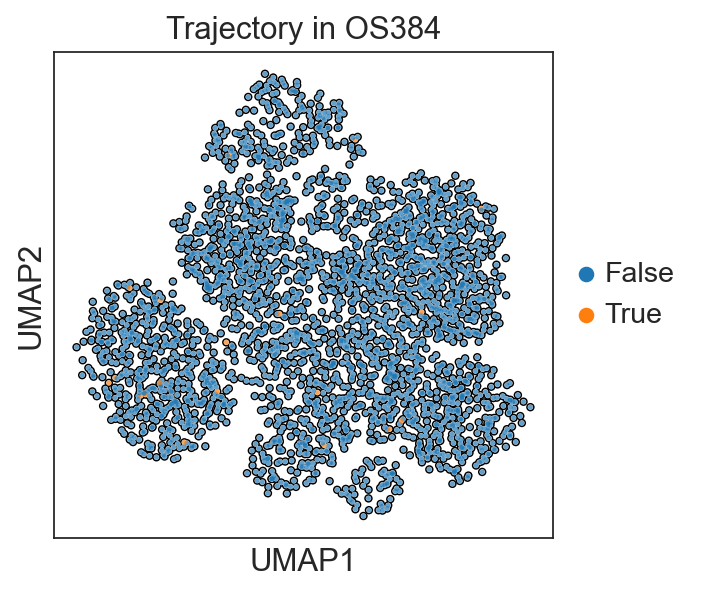

In [40]:
# reading in depleted 10X cell barcodes
trajectory_cell_barcodes = pd.read_csv("/Users/brendamelano/Desktop/trajectory_10X_384_inVivo_LT.csv")


# creating a vector with just the barcodes
trajectory_cell_barcodes = trajectory_cell_barcodes['x']

# removing the suffix from the seurat barcodes
trajectory_cell_barcodes = trajectory_cell_barcodes.map(lambda x: x.lstrip('').rstrip('-1'))

adata_obs = adata.obs_names

adata_obs = adata_obs.to_numpy()

# create new categorical column called `selection`
adata.obs['trajectory_10X'] = pd.Categorical(adata.obs_names.isin(trajectory_cell_barcodes)) 

sc.pl.umap(adata, color='trajectory_10X', add_outline=True, s=90, size = 20, title = 'Trajectory in OS384')

# reading in depleted 10X cell barcodes
trajectory_cell_barcodes = pd.read_csv("/Users/brendamelano/Desktop/trajectory_10X_384_inVivo_LT.csv")

# creating a vector with just the barcodes
trajectory_cell_barcodes = trajectory_cell_barcodes['x']

# removing the suffix from the seurat barcodes
trajectory_cell_barcodes = trajectory_cell_barcodes.map(lambda x: x.lstrip('').rstrip('-1'))

adata_obs = adata.obs_names

adata_obs = adata_obs.to_numpy()

# create new categorical column called `selection`
adata.obs['trajectory_10X'] = pd.Categorical(adata.obs_names.isin(trajectory_cell_barcodes)) 

sc.pl.umap(adata, color='trajectory_10X', add_outline=True, s=90, size = 20, title = 'Trajectory in OS384')

# State Module enrichment

computing score 'State_A_score'
    finished: added
    'State_A_score', score of gene set (adata.obs).
    110 total control genes are used. (0:00:00)
computing score 'Subtype_B_score'
    finished: added
    'Subtype_B_score', score of gene set (adata.obs).
    342 total control genes are used. (0:00:00)
computing score 'Subtype_C_score'
    finished: added
    'Subtype_C_score', score of gene set (adata.obs).
    259 total control genes are used. (0:00:00)


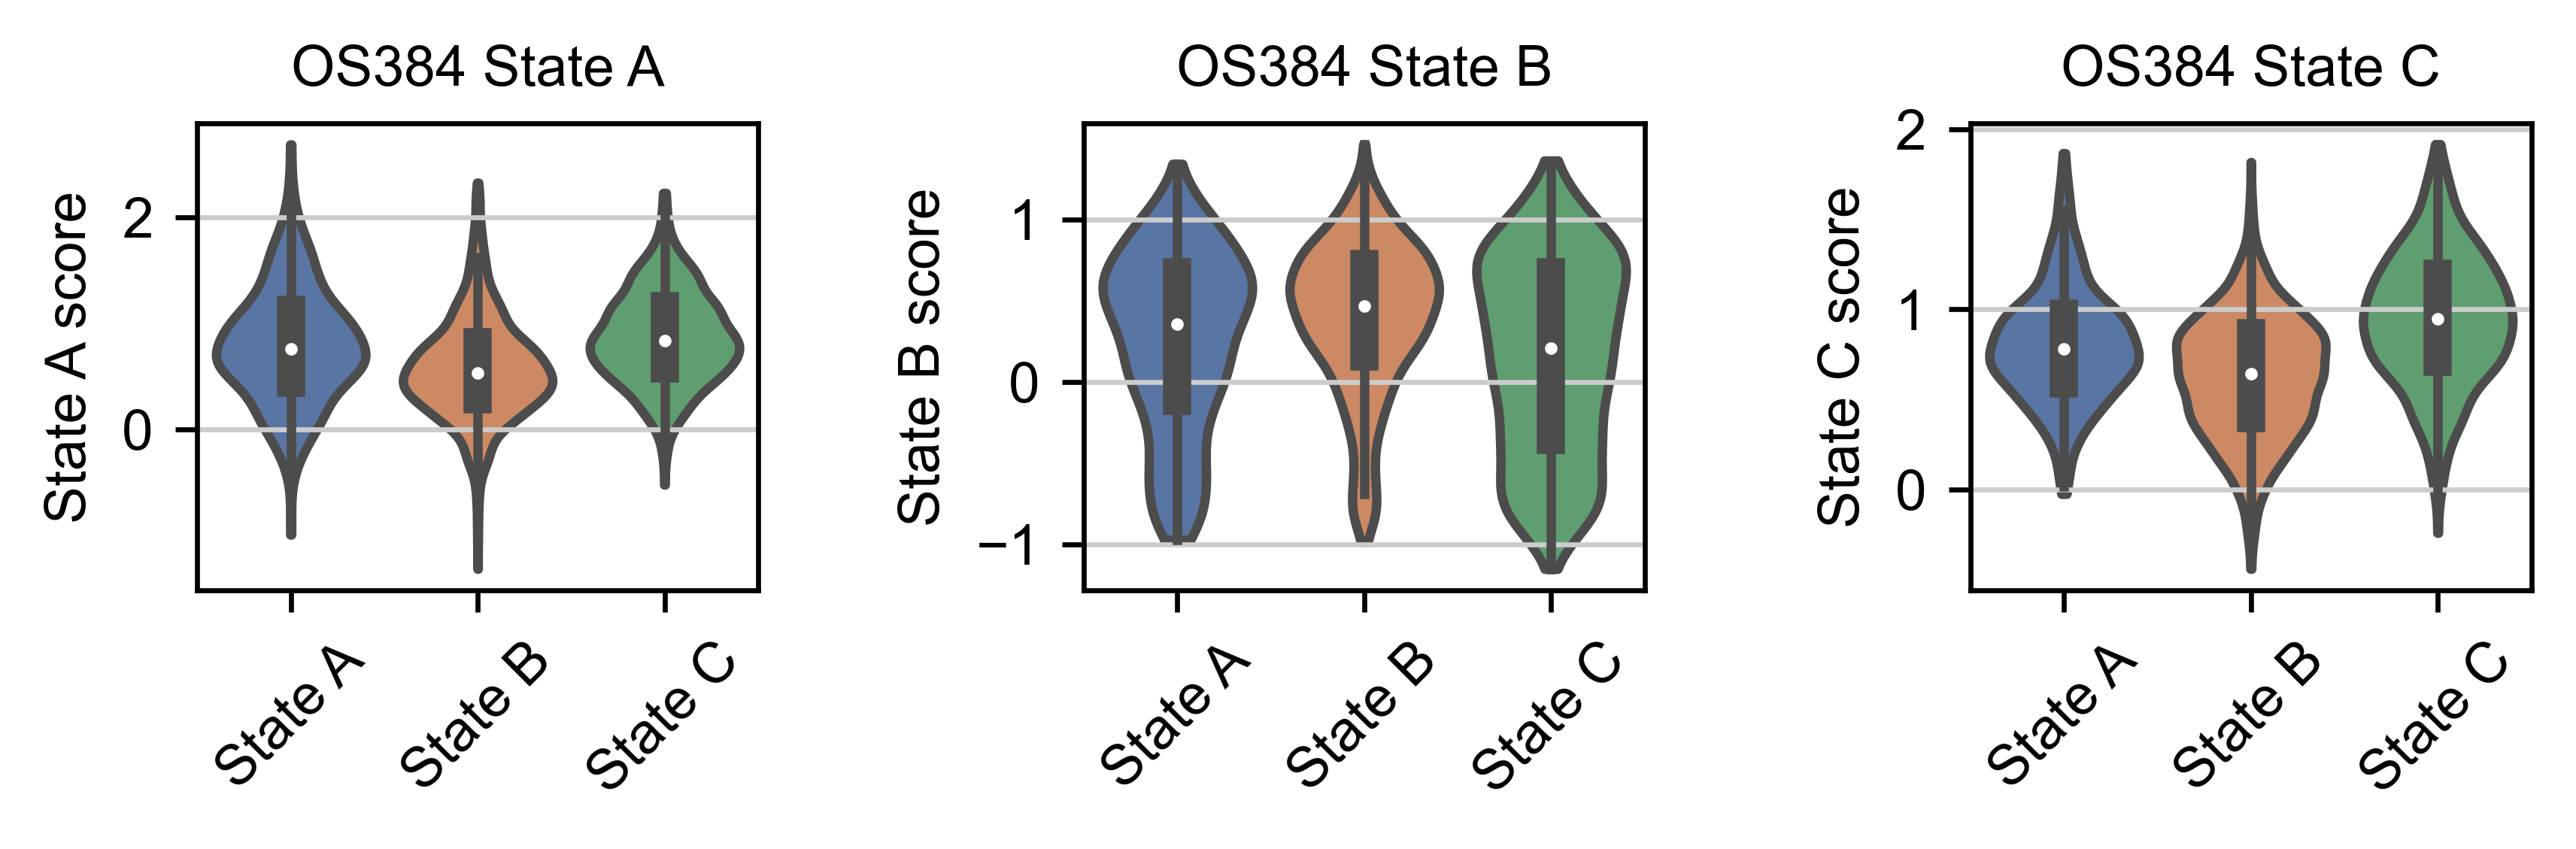

In [7]:
# Reading in gene lists for GSEA
Subtype_A_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/gmt_files/Subtype_A_module.csv')]
Subtype_B_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/gmt_files/Subtype_B_module.csv')]
Subtype_C_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/gmt_files/Subtype_C_module.csv')]

# Keeping only genes that appear in the adata
Subtype_A_genes = [x for x in Subtype_A_genes if x in adata.var_names]
Subtype_B_genes = [x for x in Subtype_B_genes if x in adata.var_names]
Subtype_C_genes = [x for x in Subtype_C_genes if x in adata.var_names]

# Computing GSEA scores
sc.tl.score_genes(adata, Subtype_A_genes, ctrl_size=50, gene_pool=None, n_bins=25, 
                  score_name='State_A_score', random_state=0, copy=False, use_raw=None)
sc.tl.score_genes(adata, Subtype_B_genes, ctrl_size=50, gene_pool=None, n_bins=25, 
                  score_name='Subtype_B_score', random_state=0, copy=False, use_raw=None)
sc.tl.score_genes(adata, Subtype_C_genes, ctrl_size=50, gene_pool=None, n_bins=25, 
                  score_name='Subtype_C_score', random_state=0, copy=False, use_raw=None)

# Plotting the results with all fonts set to 9 and slanted x-axis titles
fig, axs = plt.subplots(1, 3, figsize=(6, 2.1))

sc.pl.violin(adata, ['State_A_score'], 
             groupby='State', stripplot=False, inner='box', 
             ylabel='', ax=axs[0], show=False)  # Set ylabel to empty string

axs[0].set_title('OS384 State A', fontsize=9)
axs[0].set_ylabel('State A score', fontsize=9)  # Set y-axis label with fontsize 9
axs[0].tick_params(axis='both', which='major', labelsize=9)
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xlabel('')  # Remove x-axis label

sc.pl.violin(adata, ['Subtype_B_score'], 
             groupby='State', stripplot=False, inner='box', 
             ylabel='', ax=axs[1], show=False)  # Set ylabel to empty string

axs[1].set_title('OS384 State B', fontsize=9)
axs[1].set_ylabel('State B score', fontsize=9)  # Set y-axis label with fontsize 9
axs[1].tick_params(axis='both', which='major', labelsize=9)
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('')  # Remove x-axis label

sc.pl.violin(adata, ['Subtype_C_score'], 
             groupby='State', stripplot=False, inner='box', 
             ylabel='', ax=axs[2], show=False)  # Set ylabel to empty string

axs[2].set_title('OS384 State C', fontsize=9)
axs[2].set_ylabel('State C score', fontsize=9)  # Set y-axis label with fontsize 9
axs[2].tick_params(axis='both', which='major', labelsize=9)
axs[2].tick_params(axis='x', rotation=45)
axs[2].set_xlabel('')  # Remove x-axis label

plt.tight_layout()

# Saving the figure onto the desktop
plt.savefig('/Users/brendamelano/Desktop/OS384_gsea_scores.svg', format='svg')
plt.show()


# scoring cell cycle

97
76
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    536 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    613 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


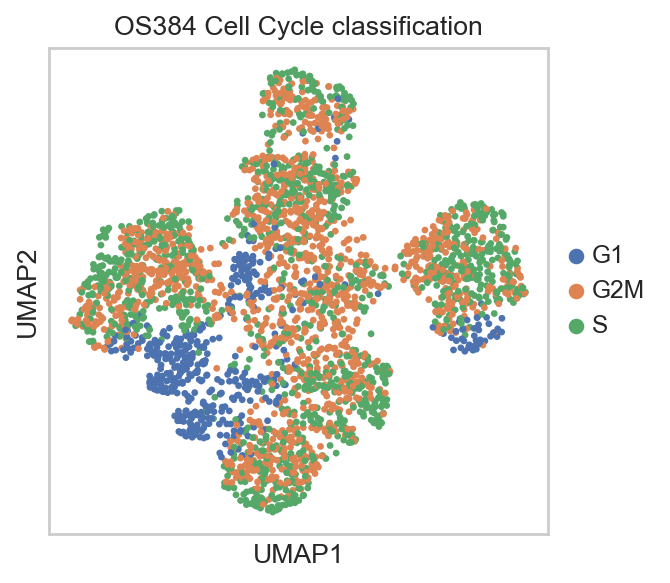

In [20]:
cell_cycle_genes = [x.strip() for x in open('/Users/brendamelano/Desktop/scvi/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
print(len(cell_cycle_genes))

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

sc.pl.umap(
    adata,
    color=["phase"],
    frameon=True,
    title = "OS384 Cell Cycle classification"
)

# RNA velocity with scVelo

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on distances
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/12 cores)


  0%|          | 0/1027 [00:00<?, ?gene/s]

    finished (0:06:12) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/3236 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


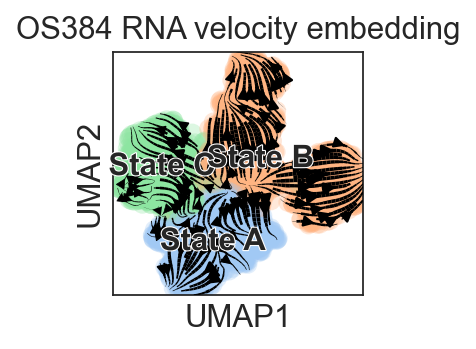

In [3]:
# computing the moments
scv.pp.moments(adata, mode = 'distances')
 
    
# recovering dynamics
scv.tl.recover_dynamics(adata)


# inferring the DYNAMIC velocities
scv.tl.velocity(adata, mode='dynamical')


# computing the velocity graph
scv.tl.velocity_graph(adata)

# creating a dataframe with the cluster IDs
clusters = pd.DataFrame(adata.obs['leiden'].astype('int64').values)

# Define the number of clusters
n_clusters = len(clusters[0].unique())

# Define a color palette with a limited number of colors
colors = sns.color_palette('pastel', n_clusters)

# Create a dictionary that maps each cluster ID to a color from the palette
cluster_colors = dict(zip(sorted(clusters[0].unique()), colors))


# Map the cluster IDs to their corresponding colors
adata.uns['ClusterName_colors'] = [cluster_colors[c] for c in clusters[0]]


# Set the plot style to 'white' to remove grid lines
sns.set_style('white')


# Plot the stream with the discrete color legend
scv.pl.velocity_embedding_stream(adata, basis='umap', 
                                 color='State', 
                                 palette=colors, 
                                 title = 'OS384 RNA velocity embedding',
                                 frameon = True)

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


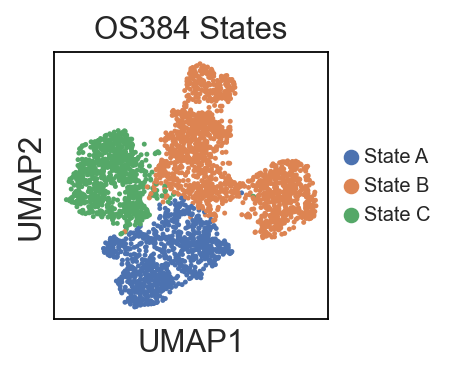

# CellRank

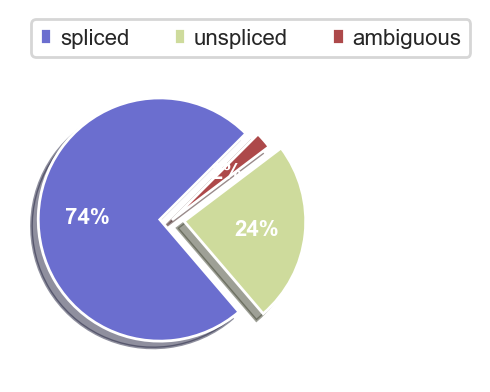

  0%|          | 0/3236 [00:00<?, ?cell/s]

  0%|          | 0/3236 [00:00<?, ?cell/s]

GPCCA[kernel=(0.8 * VelocityKernel[n=3236] + 0.2 * ConnectivityKernel[n=3236]), initial_states=None, terminal_states=None]


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/plotting/utils.py:1391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/plotting/utils.py:1392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


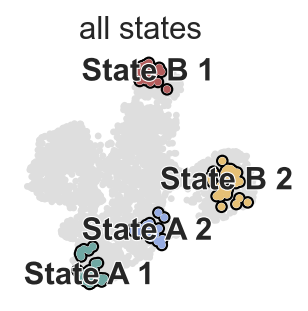

GPCCA[kernel=(0.8 * VelocityKernel[n=3236] + 0.2 * ConnectivityKernel[n=3236]), initial_states=None, terminal_states=['State A_1', 'State A_2', 'State B_1', 'State B_2']]

In [4]:
# Computing proportions of spliced and unspliced RNA
scv.pl.proportions(adata)


# Setting up the velocity kernel
vk = cr.kernels.VelocityKernel(adata)


# compute the transition matrix
vk.compute_transition_matrix()


# combining the velocity and connectivity kernel
ck = cr.kernels.ConnectivityKernel(adata)
ck.compute_transition_matrix()


# Combining the velocity kernel with the connectivity kernel
combined_kernel = 0.8 * vk + 0.2 * ck


# Setting up the gPCCA estmator
g = GPCCA(combined_kernel)
print(g)


g.fit(n_states=4, cluster_key="State")
g.plot_macrostates(which="all")

g.predict_terminal_states(method="top_n", n_states=4)


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/plotting/utils.py:1391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/plotting/utils.py:1392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


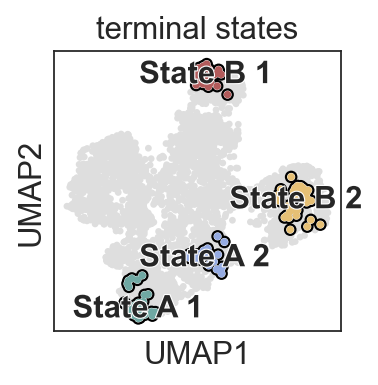

Defaulting to `'gmres'` solver.


  0%|          | 0/4 [00:00<?, ?/s]

/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


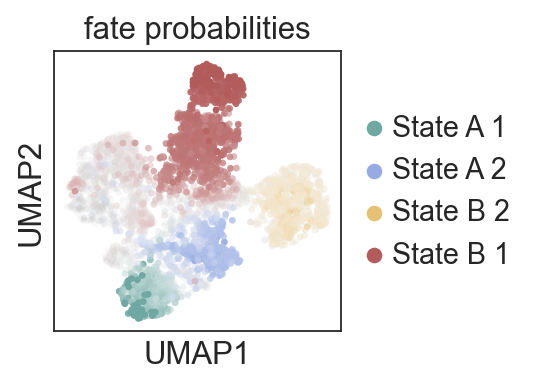

In [5]:
# Create a figure with the specified dimensions
fig, ax = plt.subplots(figsize=(2.3, 2.3))

# Plot macrostates with rasterization
g.plot_macrostates(which="terminal", ax=ax, frameon=True, rasterized=True)

# Set the title with a custom font size
ax.set_title("OS384 Terminal states", fontsize=12)

# Set the axis labels and ticks to have a larger font size
ax.set_xlabel("UMAP1", fontsize=12)
ax.set_ylabel("UMAP2", fontsize=12)
ax.tick_params(axis='both', labelsize=12)

# Save the plot as SVG
#fig.savefig("/Users/brendamelano/Desktop/OS384_terminal_states.svg", format='svg', dpi=300)

# Computing fate probabilities
g.compute_fate_probabilities()

# Plot fate probabilities and save the figure with a frame on
fig2, ax2 = plt.subplots(figsize=(2.3, 2.3))
g.plot_fate_probabilities(ax=ax2, legend_loc="right", frameon=True)

# Save the fate probabilities UMAP as an SVG file
#fig2.savefig("/Users/brendamelano/Desktop/OS384_fate_probabilities.svg", format='svg', dpi=300)

In [6]:
State_A2_drivers = g.compute_lineage_drivers(lineages="State A_2")
State_A2_drivers = State_A2_drivers.head(60)

model = cr.models.GAMR(adata)

scv.tl.latent_time(adata)

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


In [7]:
tf_list = pd.read_csv("/Users/brendamelano/Desktop/transcription_factors.csv", header=None, names=["Gene"])

# Step 2: Ensure the column with transcription factor names is correctly named. 
# Replace 'Gene' with the appropriate column name if different.
transcription_factors = tf_list['Gene'].tolist()

State_A1_drivers = g.compute_lineage_drivers(lineages="State A_1")
State_A1_drivers = State_A1_drivers.head(30)

In [32]:


# Step 3: Filter State_A1_drivers based on transcription factor matches
State_A1_filtered = State_A1_drivers[State_A1_drivers.index.isin(transcription_factors)]

# Step 4: Print the filtered DataFrame
print(State_A1_filtered)

        State A_1_corr  State A_1_pval  State A_1_qval  State A_1_ci_low  \
Gene                                                                       
TSHZ2         0.402207   8.846302e-130   5.307781e-128          0.372919   
TCF4          0.386133   1.267785e-118   6.338923e-117          0.356419   
NKX2-5        0.378191   2.347631e-113   1.006128e-111          0.348273   
ARID5B        0.372723   8.053325e-110   3.355552e-108          0.342667   

        State A_1_ci_high  
Gene                       
TSHZ2            0.430695  
TCF4             0.415068  
NKX2-5           0.407339  
ARID5B           0.402016  


  0%|          | 0/4 [00:00<?, ?gene/s]

  0%|          | 0/1 [00:00<?, ?gene/s]

  0%|          | 0/1 [00:00<?, ?gene/s]

KeyError: 'Gene `STAT1` not found in `adata.var_names`.'

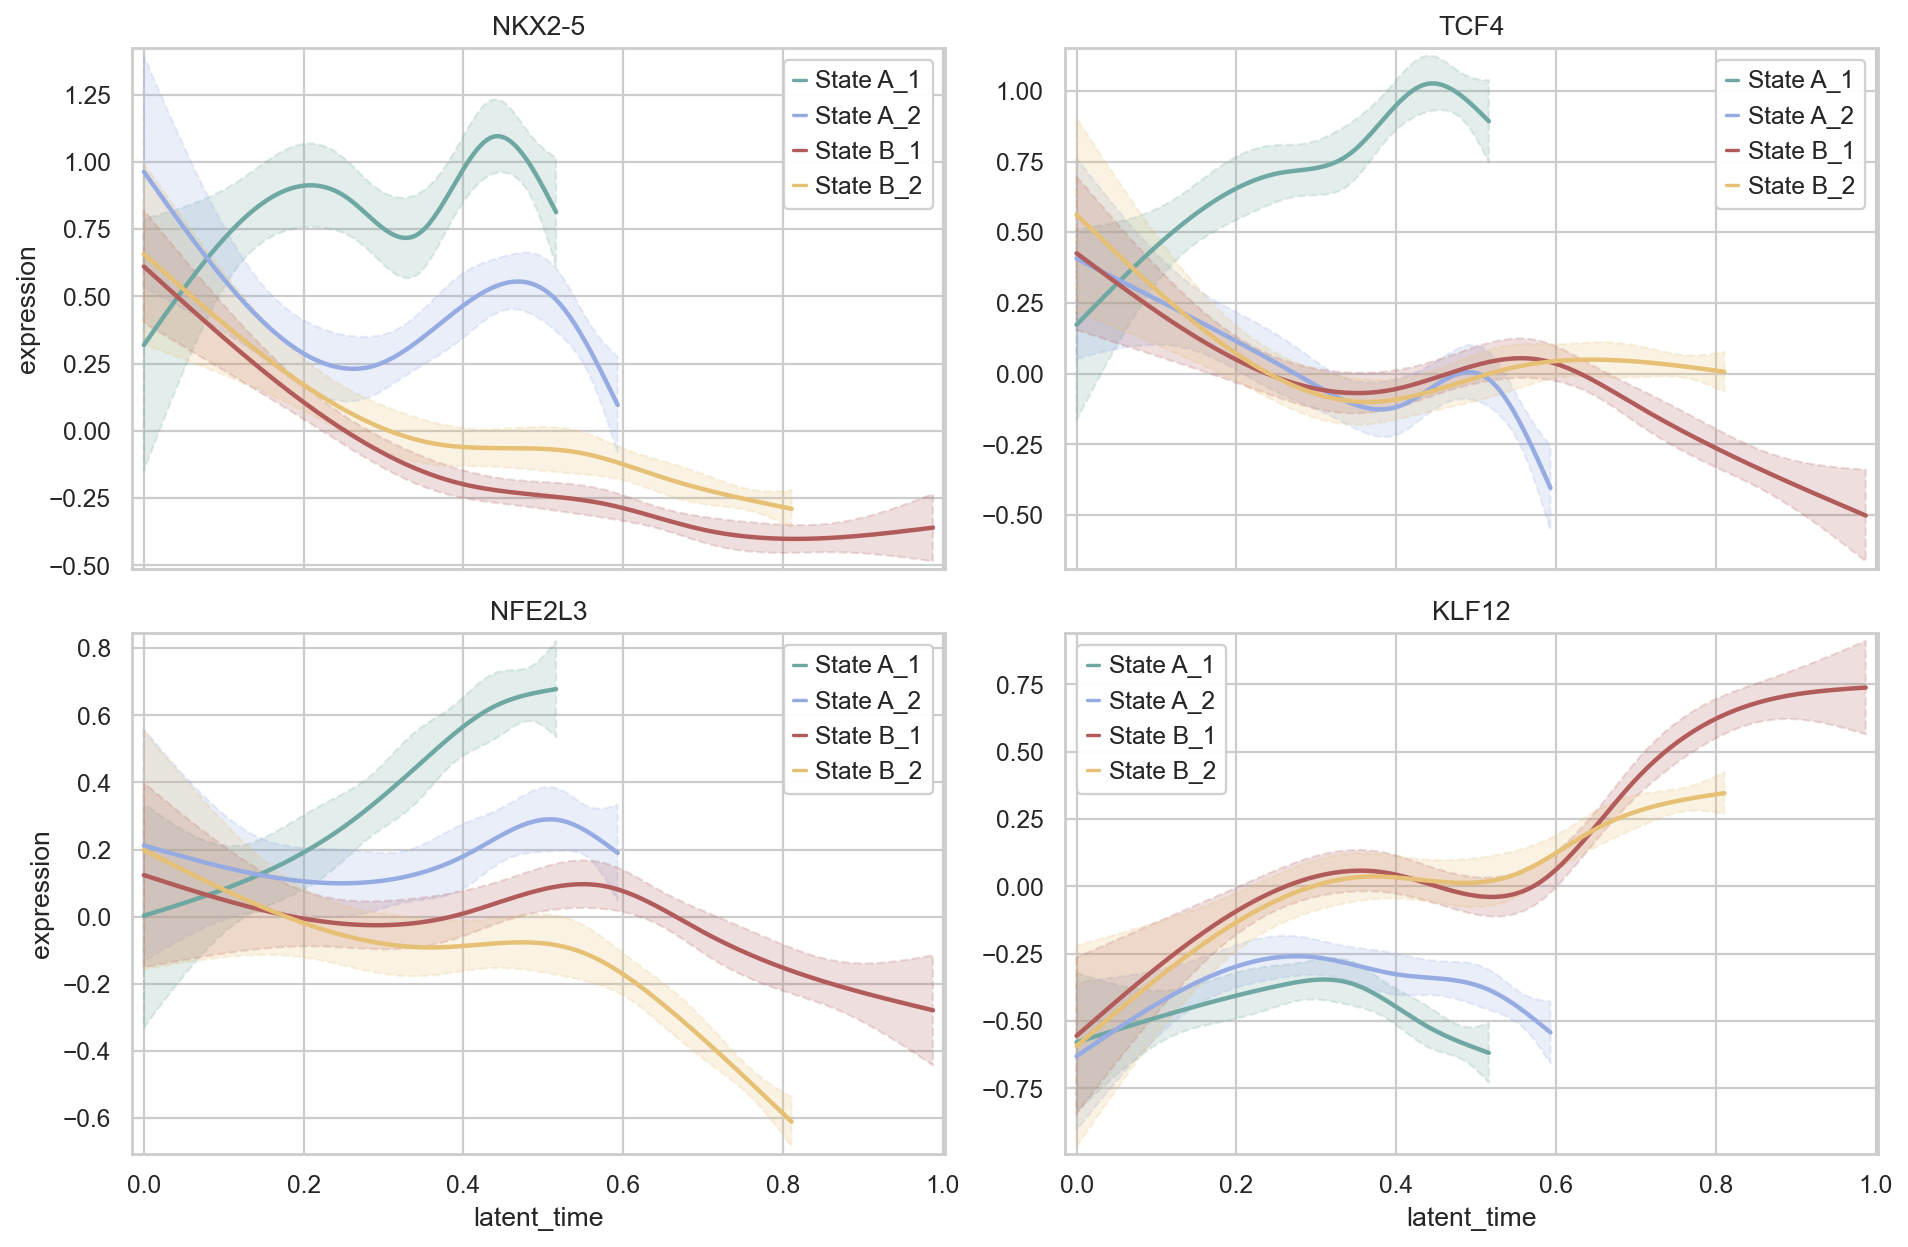

In [12]:
cr.pl.gene_trends(
    adata,
    model=model,
    genes=["NKX2-5", "TCF4", "NFE2L3", "KLF12"],
    same_plot=True,
    ncols=2,
    time_key="latent_time",  # Use the correct key here
    hide_cells=True,
)


desktop_path = os.path.expanduser("~/Desktop")

# List of genes to plot
genes = ['DDIT3', 'TSHZ2', 'STAT1', 'NR0B1', 'NFE2L3', 'TCF4', 'NFKB2', 'IRF1', 'ZIC2', 'KLF12', 'JUNB', 'JUN']


# Set the desired figure size and font size
fig_size = (2.3, 2.3)
font_size = 9


for gene in genes:
    
    # Generate the gene trends plot for each gene
    cr.pl.gene_trends(
        adata,
        model=model,
        genes=[gene],
        same_plot=True,
        ncols=1,
        time_key="latent_time",  # Use the correct key here
        hide_cells=True,
    )

    # Set the figure size
    plt.gcf().set_size_inches(fig_size)

    # Adjust font size
    plt.rcParams.update({'font.size': font_size})

    # Save the plot as SVG to the desktop directory
    save_path = os.path.join(desktop_path, f"{gene}_trends.svg")
    plt.savefig(save_path, format="svg")

    # Close the plot to free up memory
    plt.close()

In [10]:
from scipy.sparse import issparse

  0%|          | 0/20 [00:00<?, ?gene/s]

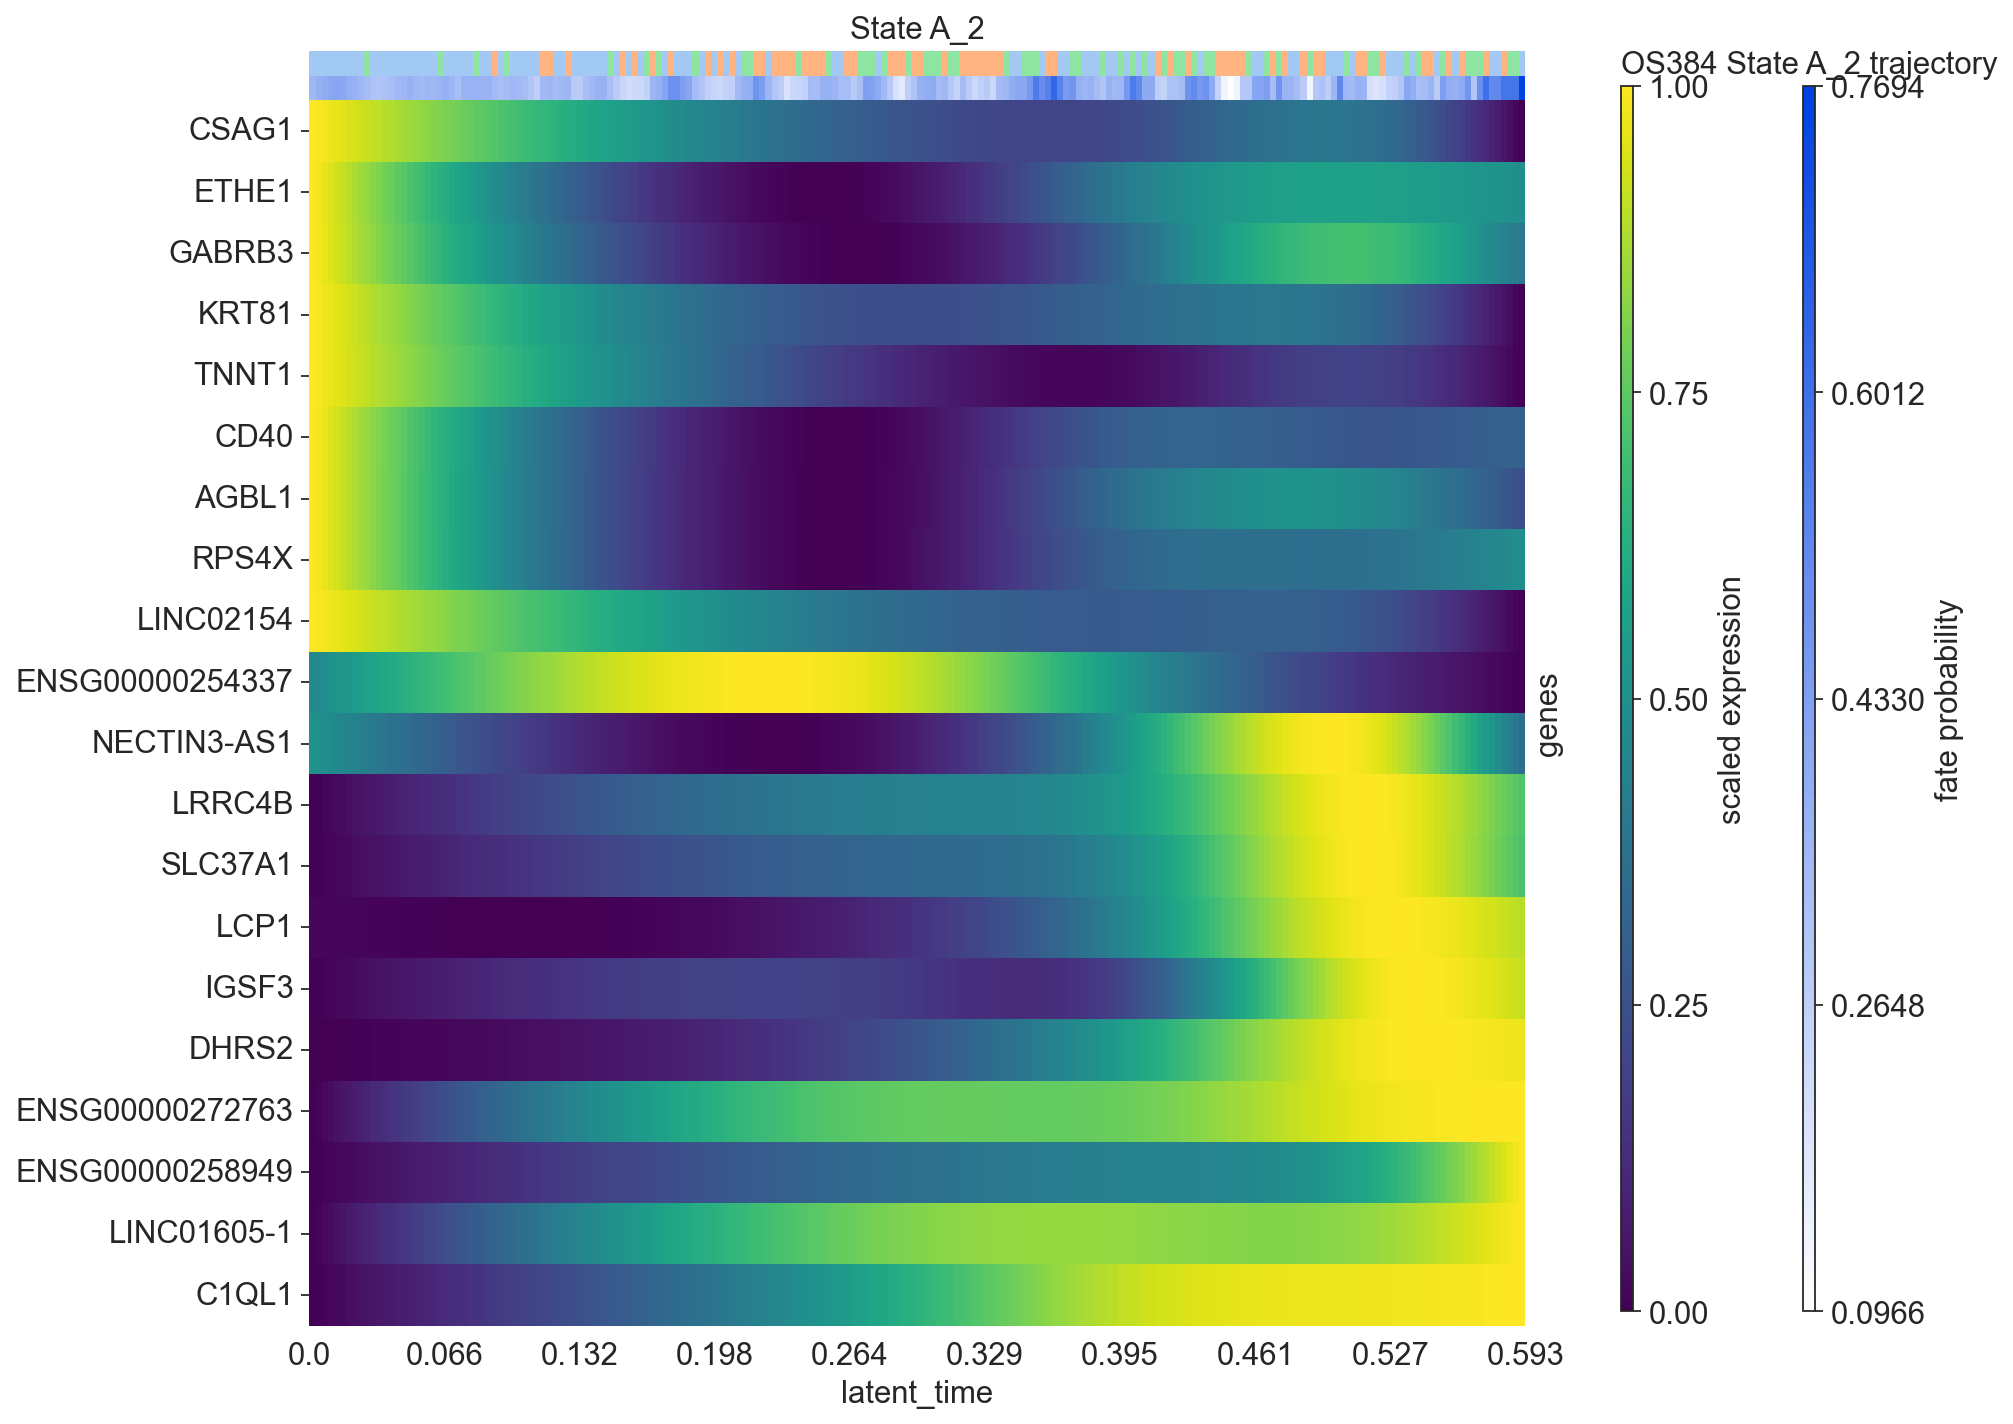

In [14]:
# Plot heatmap
cr.pl.heatmap(
    adata,
    model=model,  # use the model from before
    lineages="State A_2",
    cluster_key="State",
    show_fate_probabilities=True,
    genes=State_A2_drivers.head(40).index,
    time_key="latent_time",
    figsize=(12, 10),  # Customize figure size
    show_all_genes=True,
    weight_threshold=(1e-3, 1e-3),
)

# Add a custom title
plt.title('OS384 State A_2 trajectory', fontsize=14)  # Set title and fontsize

# Save plot to your desktop
plt.savefig('/Users/brendamelano/Desktop/OS384_heatmap_plot.svg', format='svg', dpi=300, bbox_inches='tight')  # Adjust path

In [10]:
State_A1_drivers = g.compute_lineage_drivers(lineages="State A_1")

In [12]:
# reading in the list of transcription factors
transcription_factors = pd.read_csv('/Users/brendamelano/Desktop/transcription_factors.csv', header = None)


transcription_factors

,0
0,AC008770.3
1,AC023509.3
2,AC092835.1
3,AC138696.1
4,ADNP
...,...
1634,ZUFSP
1635,ZXDA
1636,ZXDB
1637,ZXDC


In [ ]:
State_A1_drivers[np.in1d(State_A1_drivers, transcription_factors)]

# visualizing top drivers

In [4]:
def plot_facet_gene_expression(adata, gene_list, output_file, cell_line, significance_threshold=0.05):
    """
    Quantify and visualize the expression of specified genes as a facet plot across different states.
    Applies FDR correction for multiple testing.

    Parameters:
    - adata: AnnData object 
    - gene_list: List of gene names to quantify and plot.
    - output_file: Path to save the resulting facet plot.
    - cell_line: String specifying the cell line name to include in plot titles.
    - significance_threshold: FDR threshold for significance (default is 0.05).
    """
    # Filter genes to keep only those present in the dataset
    genes_in_data = [gene for gene in gene_list if gene in adata.var_names]
    genes_not_found = [gene for gene in gene_list if gene not in adata.var_names]

    if genes_not_found:
        print(f"The following genes were not found in the dataset and will be skipped: {', '.join(genes_not_found)}")
    
    if not genes_in_data:
        print("None of the specified genes are present in the dataset.")
        return

    # List to store p-values for correction
    p_values = []

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame()

    # Calculate mean expression and perform tests for each gene
    for gene in genes_in_data:
        # Extract the gene expression data
        gene_data = adata[:, gene].X.toarray().flatten()  # Get the gene expression vector

        # Create a DataFrame with state, gene name, and expression data
        gene_df = pd.DataFrame({
            'State': adata.obs['State'],
            'Expression': gene_data,
            'Gene': gene
        })

        # Append the gene-specific data to the main plot_df
        plot_df = pd.concat([plot_df, gene_df], axis=0)

        # Perform Kruskal-Wallis test (non-parametric alternative to ANOVA)
        _, p_value = kruskal(*[gene_df.loc[gene_df['State'] == state, 'Expression'] for state in gene_df['State'].unique()])
        p_values.append(p_value)

    # Step 2: Apply Benjamini-Hochberg (BH) correction
    _, corrected_pvals, _, _ = multipletests(p_values, alpha=significance_threshold, method='fdr_bh')

    # Step 3: Add corrected p-values to the DataFrame
    pval_dict = dict(zip(genes_in_data, corrected_pvals))
    plot_df['Corrected p-value'] = plot_df['Gene'].map(pval_dict)

    # Step 4: Create the facet plot
    g = sns.FacetGrid(plot_df, col='Gene', col_wrap=2, sharey=False, height=3, aspect=1.3)
    g.map(sns.barplot, 'State', 'Expression', palette='Set2', edgecolor='black')

    # Customize plot appearance
    for ax, gene in zip(g.axes.flat, genes_in_data):
        # Annotate each plot with the corrected p-value only
        pval = pval_dict[gene]
        ax.text(0.95, 0.95, f'p = {pval:.2e}',
                horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, fontsize=12)  # Adjust p-value font size
        
        # Customize tick and label fonts
        ax.set_xlabel('')
        ax.set_ylabel(f'{gene} Expression', fontsize=12)  # Adjust Y-axis label font size
        ax.tick_params(axis='x', labelsize=12)  # Adjust X-axis number font size
        ax.tick_params(axis='y', labelsize=12)  # Adjust Y-axis number font size
        ax.set_title(f"{cell_line} - {gene}", fontsize=14)  # Adjust title font size

    # Set overall plot labels and layout
    g.set_titles(col_template="{col_name}", fontsize=14)  # Adjust the facet title font size
    g.set_xlabels("State", fontsize=14)  # Adjust X-axis label font size
    g.set_ylabels("Expression", fontsize=14)  # Adjust Y-axis label font size
    g.fig.suptitle(f"{cell_line} Gene Expression Across States", y=1.05, fontsize=20)  # Adjust the master title font size
    g.fig.tight_layout()

    # Save the facet plot
    plt.savefig(output_file, format='svg', dpi=300)
    plt.close()
    print(f"Facet plot saved to {output_file}")


# Example Usage
# Path to save the output plot
output_file = '/Users/brendamelano/Desktop/OS384_drivers_expression_facet.svg'

# Specify the cell line name
cell_line = 'OS384'


# Gene list
gene_list = ['DDIT3', 'TSHZ2', 'STAT1', 'NR0B1', 'NFE2L3', 'TCF4', 'NFKB2', 'IRF1', 'ZIC2', 'KLF12', 'JUNB', 'JUN']


# Call the function to generate the facet plot
plot_facet_gene_expression(adata, gene_list, output_file, cell_line)

The following genes were not found in the dataset and will be skipped: STAT1, NR0B1, NFKB2, IRF1, ZIC2, JUNB, JUN


/Users/brendamelano/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Facet plot saved to /Users/brendamelano/Desktop/OS384_drivers_expression_facet.svg
